In [8]:
import pandas as pd
import json

# Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
import os
os.environ["TOKENIZERS_PARALLELISM"] = "true"

In [5]:
from os.path import join, basename, exists
from config import data_dir


In [15]:
# Read in the data from data/arxiv.json
# Only read in the first 1000 rows
df = pd.read_json('data/arxiv.json', lines=True, nrows=1000)
df.columns

Index(['id', 'submitter', 'authors', 'title', 'comments', 'journal-ref', 'doi',
       'report-no', 'categories', 'license', 'abstract', 'versions',
       'update_date', 'authors_parsed'],
      dtype='object')

In [17]:
df.head(5)

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,704.0001,Pavel Nadolsky,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,ANL-HEP-PR-07-12,hep-ph,None,A fully differential calculation in perturba...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2008-11-26,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,..."
1,704.0002,Louis Theran,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,None,None,None,math.CO cs.CG,http://arxiv.org/licenses/nonexclusive-distrib...,"We describe a new algorithm, the $(k,\ell)$-...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-12-13,"[[Streinu, Ileana, ], [Theran, Louis, ]]"
2,704.0003,Hongjun Pan,Hongjun Pan,The evolution of the Earth-Moon system based o...,"23 pages, 3 figures",None,None,None,physics.gen-ph,None,The evolution of Earth-Moon system is descri...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2008-01-13,"[[Pan, Hongjun, ]]"
3,704.0004,David Callan,David Callan,A determinant of Stirling cycle numbers counts...,11 pages,None,None,None,math.CO,None,We show that a determinant of Stirling cycle...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2007-05-23,"[[Callan, David, ]]"
4,704.0005,Alberto Torchinsky,Wael Abu-Shammala and Alberto Torchinsky,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,None,"Illinois J. Math. 52 (2008) no.2, 681-689",None,None,math.CA math.FA,None,In this paper we show how to compute the $\L...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2013-10-15,"[[Abu-Shammala, Wael, ], [Torchinsky, Alberto, ]]"


In [22]:
df['url'] = df['id'].apply(lambda x: f"https://arxiv.org/abs/{x}" if len(str(x).split(".")) >= 4 else f"https://arxiv.org/abs/0{x}")

In [24]:
df.columns 

Index(['id', 'submitter', 'authors', 'title', 'comments', 'journal-ref', 'doi',
       'report-no', 'categories', 'license', 'abstract', 'versions',
       'update_date', 'authors_parsed', 'url'],
      dtype='object')

In [23]:
df.head(5)

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed,url
0,704.0001,Pavel Nadolsky,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,ANL-HEP-PR-07-12,hep-ph,None,A fully differential calculation in perturba...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2008-11-26,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,...",https://arxiv.org/abs/0704.0001
1,704.0002,Louis Theran,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,None,None,None,math.CO cs.CG,http://arxiv.org/licenses/nonexclusive-distrib...,"We describe a new algorithm, the $(k,\ell)$-...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-12-13,"[[Streinu, Ileana, ], [Theran, Louis, ]]",https://arxiv.org/abs/0704.0002
2,704.0003,Hongjun Pan,Hongjun Pan,The evolution of the Earth-Moon system based o...,"23 pages, 3 figures",None,None,None,physics.gen-ph,None,The evolution of Earth-Moon system is descri...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2008-01-13,"[[Pan, Hongjun, ]]",https://arxiv.org/abs/0704.0003
3,704.0004,David Callan,David Callan,A determinant of Stirling cycle numbers counts...,11 pages,None,None,None,math.CO,None,We show that a determinant of Stirling cycle...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2007-05-23,"[[Callan, David, ]]",https://arxiv.org/abs/0704.0004
4,704.0005,Alberto Torchinsky,Wael Abu-Shammala and Alberto Torchinsky,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,None,"Illinois J. Math. 52 (2008) no.2, 681-689",None,None,math.CA math.FA,None,In this paper we show how to compute the $\L...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2013-10-15,"[[Abu-Shammala, Wael, ], [Torchinsky, Alberto, ]]",https://arxiv.org/abs/0704.0005


In [3]:
# Get number of lines in the file
# This is the number of papers in the dataset
!wc -l data/arxiv.json

2190411 data/arxiv.json


In [4]:
title, abstract = df['title'], df['abstract']

In [5]:
from sentence_transformers import SentenceTransformer

In [6]:
!pip install ipywidgets

In [7]:
# Base BERT model from sbert.net
model = SentenceTransformer('bert-base-nli-mean-tokens')
model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
)

In [8]:
# 128 is the max sequence length meaning that the model will truncate the input to 128 tokens
# word_embedding_dimension is the dimention of the embedding vector
# 768 is the default for BERT
# pooling_mode_mean_tokens - Embeddings have been pulled by taking the mean of the token embeddings

In [9]:
sentences = abstract[:5]

In [10]:
sentences

0      A fully differential calculation in perturba...
1      We describe a new algorithm, the $(k,\ell)$-...
2      The evolution of Earth-Moon system is descri...
3      We show that a determinant of Stirling cycle...
4      In this paper we show how to compute the $\L...
Name: abstract, dtype: object

In [11]:
emebddings = model.encode(sentences)
emebddings

array([[-0.5790504 ,  0.7573719 ,  0.31572536, ..., -0.0511416 ,
         0.27770776,  0.18660651],
       [-1.054074  ,  0.41554064,  0.8184872 , ...,  0.18584919,
        -0.27234364,  0.1765604 ],
       [-0.56067294,  0.8800707 , -0.22142969, ..., -0.31147614,
         0.36809534,  0.54194605],
       [-0.3555644 ,  0.68213433, -0.11631436, ..., -0.75482786,
        -0.7283997 ,  1.0442191 ],
       [-0.348766  ,  0.8173109 ,  0.58921427, ..., -0.24720173,
        -0.27481237,  0.8952119 ]], dtype=float32)

In [12]:
emebddings.shape

(5, 768)

which corresponds to word_embedding_dimension

### Semantic Textual Similarity

There are also some alternatives
- Semantic Search (Identify the most similar documents to a query, with semantics!)
- Clustering (Group similar documents together)

In [13]:
import numpy as np
from sentence_transformers.util import cos_sim

sim = np.zeros((len(sentences), len(sentences)))

for i in range(len(sentences)):
    
    sim[i:, i] = cos_sim(emebddings[i], emebddings[i:])

In [14]:
sim

array([[0.99999982, 0.        , 0.        , 0.        , 0.        ],
       [0.4271909 , 0.99999994, 0.        , 0.        , 0.        ],
       [0.69335902, 0.44442156, 0.99999994, 0.        , 0.        ],
       [0.58501208, 0.63010275, 0.47491851, 1.        , 0.        ],
       [0.66534483, 0.60928291, 0.56870401, 0.78794754, 0.99999988]])

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

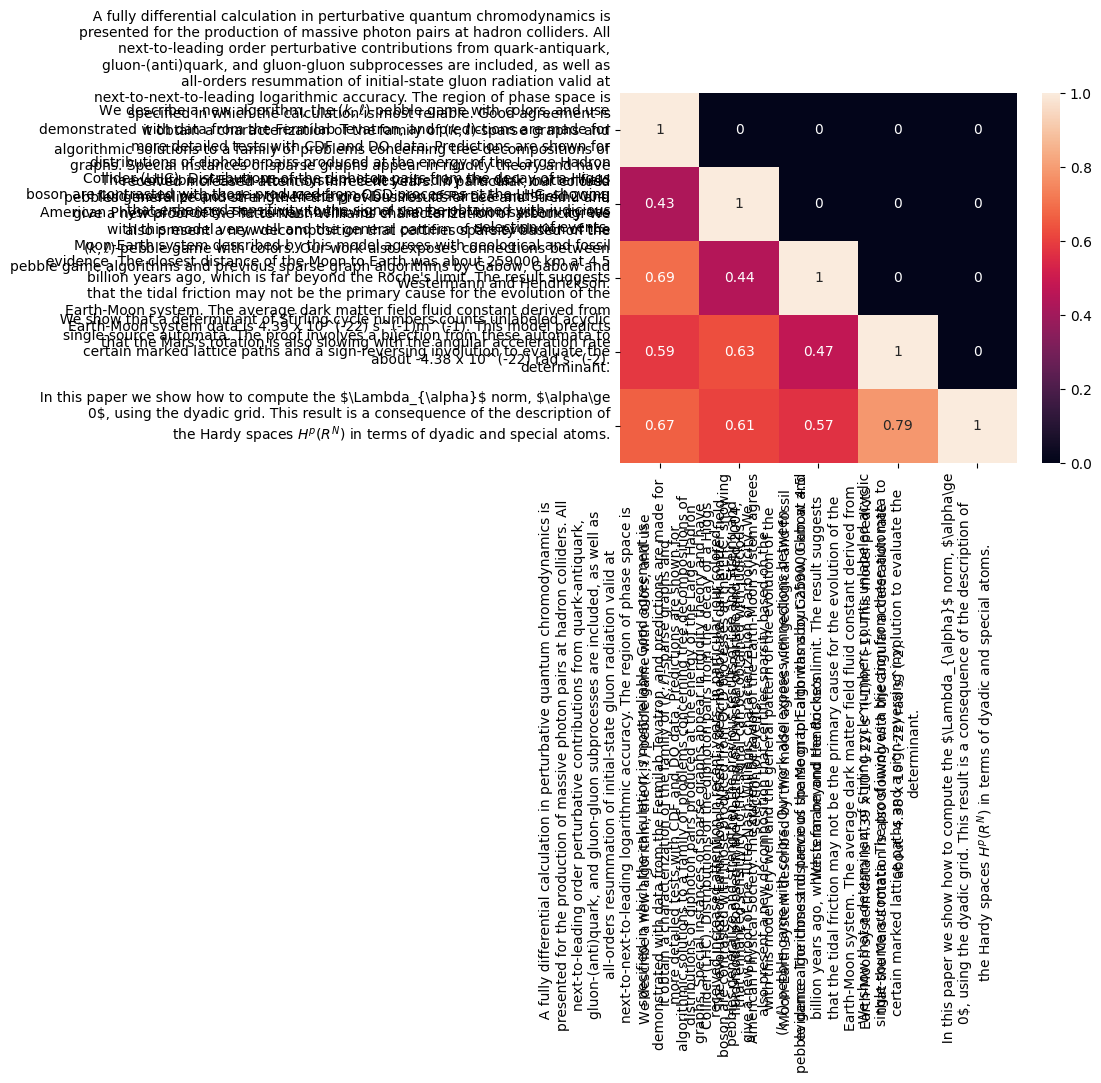

In [16]:
sns.heatmap(sim, annot=True, xticklabels=sentences, yticklabels=sentences)
plt.show()

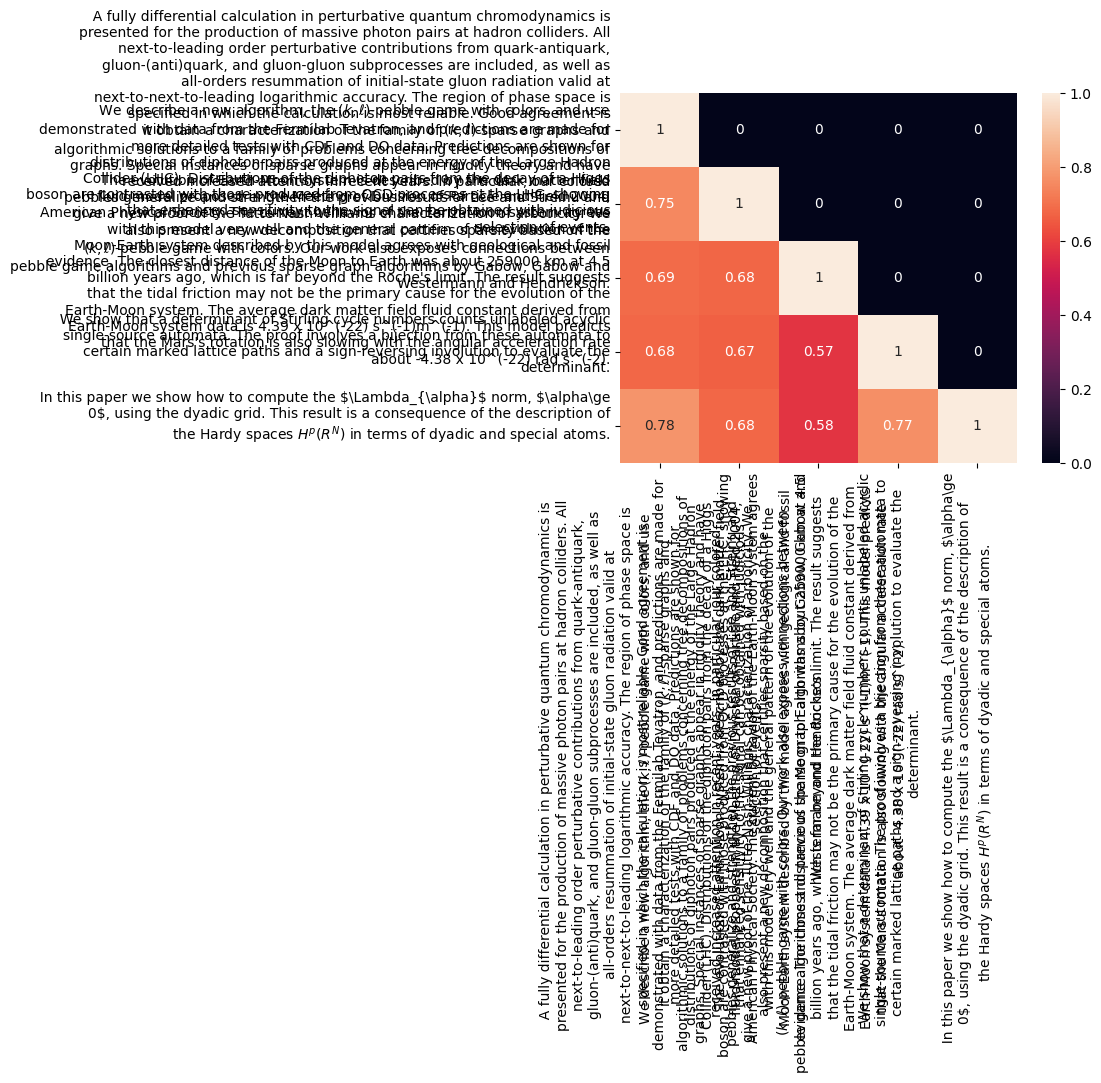

In [17]:
# Now with roberta
model = SentenceTransformer('roberta-base-nli-mean-tokens')
emebddings = model.encode(sentences)
sim = np.zeros((len(sentences), len(sentences)))

for i in range(len(sentences)):
    sim[i:, i] = cos_sim(emebddings[i], emebddings[i:])

sns.heatmap(sim, annot=True, xticklabels=sentences, yticklabels=sentences)
plt.show()


In [25]:
!pip install transformers

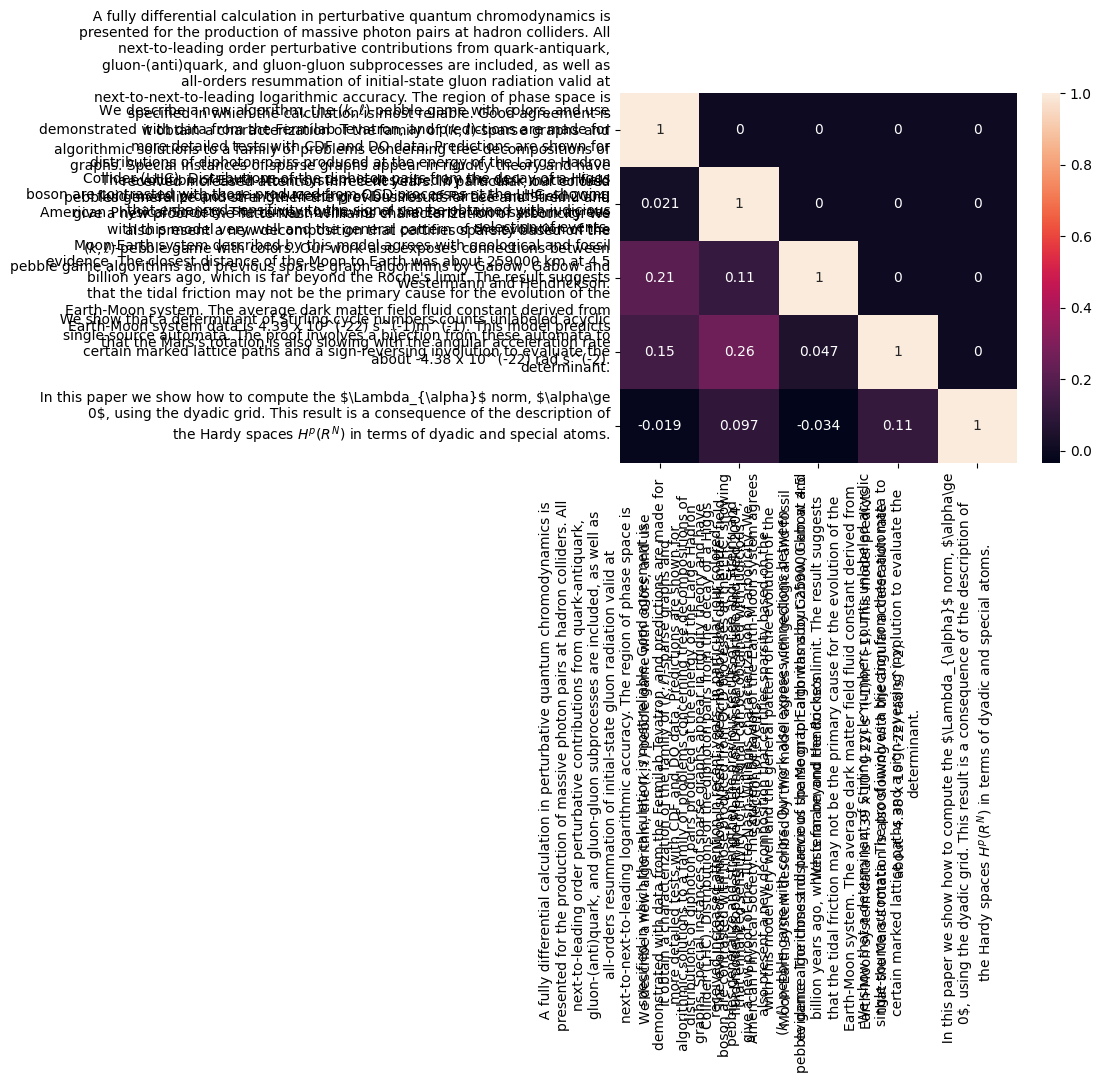

In [18]:
model = SentenceTransformer('all-mpnet-base-v2')
emebddings = model.encode(sentences)
sim = np.zeros((len(sentences), len(sentences)))

for i in range(len(sentences)):
    sim[i:, i] = cos_sim(emebddings[i], emebddings[i:])

sns.heatmap(sim, annot=True, xticklabels=sentences, yticklabels=sentences)
plt.show()


# Faiss Tutorial

https://github.com/facebookresearch/faiss/wiki

## Getting Started

In [19]:
import numpy as np
d = 64                           # dimension
nb = 100000                      # database size
nq = 10000                       # nb of queries
np.random.seed(1234)             # make reproducible
xb = np.random.random((nb, d)).astype('float32')
xb[:, 0] += np.arange(nb) / 1000.
xq = np.random.random((nq, d)).astype('float32')
xq[:, 0] += np.arange(nq) / 1000.

In [22]:
import faiss                   # make faiss available
index = faiss.IndexFlatL2(d)   # build the index
print(index.is_trained)
index.add(xb)                  # add vectors to the index
print(index.ntotal)

True
100000


#### Search

In [23]:
k = 4                          # we want to see 4 nearest neighbors
D, I = index.search(xb[:5], k) # sanity check
print(I)
print(D)
D, I = index.search(xq, k)     # actual search
print(I[:5])                   # neighbors of the 5 first queries
print(I[-5:])                  # neighbors of the 5 last queries

[[  0 393 363  78]
 [  1 555 277 364]
 [  2 304 101  13]
 [  3 173  18 182]
 [  4 288 370 531]]
[[0.        7.175174  7.2076287 7.251163 ]
 [0.        6.323565  6.684582  6.799944 ]
 [0.        5.7964087 6.3917365 7.2815127]
 [0.        7.277905  7.5279875 7.6628447]
 [0.        6.763804  7.295122  7.368814 ]]
[[ 381  207  210  477]
 [ 526  911  142   72]
 [ 838  527 1290  425]
 [ 196  184  164  359]
 [ 526  377  120  425]]
[[ 9900 10500  9309  9831]
 [11055 10895 10812 11321]
 [11353 11103 10164  9787]
 [10571 10664 10632  9638]
 [ 9628  9554 10036  9582]]


In [24]:
nlist = 100
k = 4
quantizer = faiss.IndexFlatL2(d)  # the other index
index = faiss.IndexIVFFlat(quantizer, d, nlist)
assert not index.is_trained
index.train(xb)
assert index.is_trained

index.add(xb)                  # add may be a bit slower as well
D, I = index.search(xq, k)     # actual search
print(I[-5:])                  # neighbors of the 5 last queries
index.nprobe = 10              # default nprobe is 1, try a few more
D, I = index.search(xq, k)
print(I[-5:])                  # neighbors of the 5 last queries

[[ 9900  9309  9810 10048]
 [11055 10895 10812 11321]
 [11353 10164  9787 10719]
 [10571 10664 10632 10203]
 [ 9628  9554  9582 10304]]
[[ 9900 10500  9309  9831]
 [11055 10895 10812 11321]
 [11353 11103 10164  9787]
 [10571 10664 10632  9638]
 [ 9628  9554 10036  9582]]


The values are similar, but not exactly the same as for the brute-force search (see above)

In [25]:
nlist = 100
m = 8                             # number of subquantizers
k = 4
quantizer = faiss.IndexFlatL2(d)  # this remains the same
index = faiss.IndexIVFPQ(quantizer, d, nlist, m, 8)
                                    # 8 specifies that each sub-vector is encoded as 8 bits
index.train(xb)
index.add(xb)
D, I = index.search(xb[:5], k) # sanity check
print(I)
print(D)
index.nprobe = 10              # make comparable with experiment above
D, I = index.search(xq, k)     # search
print(I[-5:])

[[   0   78  424  159]
 [   1  555  706 1063]
 [   2  179  304  134]
 [   3   64  773    8]
 [   4  288  827  531]]
[[1.5882268 6.331396  6.440189  6.473257 ]
 [1.274326  5.728371  6.056792  6.1539173]
 [1.7501019 6.1581926 6.310023  6.365546 ]
 [1.8521194 6.6665597 6.978093  6.9924507]
 [1.5939493 5.717939  6.3486733 6.374599 ]]
[[ 8746  9966  9853  9968]
 [11373 10913 10240 10403]
 [11291 10719 10494 10424]
 [10122 10005 11276 11578]
 [ 9644  9905 10370  9229]]


#### GPU

In [26]:
res = faiss.StandardGpuResources()  # use a single GPU

In [27]:
# build a flat (CPU) index
index_flat = faiss.IndexFlatL2(d)
# make it into a gpu index
gpu_index_flat = faiss.index_cpu_to_gpu(res, 0, index_flat)

In [29]:
gpu_index_flat.add(xb)         # add vectors to the index
print(gpu_index_flat.ntotal)

k = 4                          # we want to see 4 nearest neighbors
gpu_index_flat.nprobe = 10
D, I = gpu_index_flat.search(xq, k)  # actual search
print(I[:5])                   # neighbors of the 5 first queries
print(I[-5:])                  # neighbors of the 5 last queries

200000
[[   381 100381 100207    207]
 [100526    526    911 100911]
 [   838 100838 100527    527]
 [   196 100196 100184    184]
 [100526    526    377 100377]]
[[109900   9900  10500 110500]
 [111055  11055  10895 110895]
 [ 11353 111353 111103  11103]
 [ 10571 110571 110664  10664]
 [109628   9628   9554 109554]]
